# Create Data for PCA

In [28]:
import numpy as np
import math
np.random.seed(4294967295) # random seed for consistency

mu_vec1 = np.array(50 * [0])
cov_mat1 = np.identity(50)
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 75).T
# class1_sample *= 10

Populating the interactive namespace from numpy and matplotlib


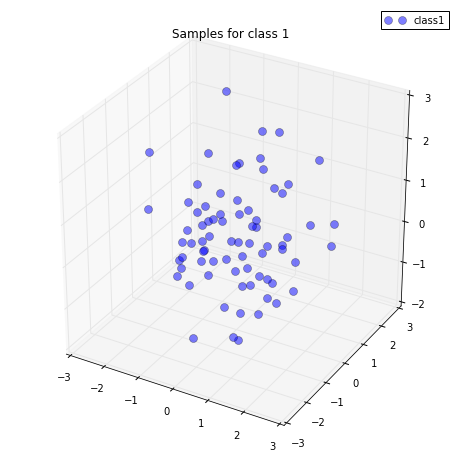

In [29]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')

plt.title('Samples for class 1')
ax.legend(loc='upper right')

plt.show()

In [30]:
all_samples = class1_sample
print 'sample data'
np.shape(all_samples)

sample data


(50, 75)

# PCA

In [31]:
from sklearn.decomposition import PCA as sklearnPCA

In [32]:
print shape(all_samples.T)
pca = sklearnPCA(n_components=10)
fitted = pca.fit(all_samples.T)
trans = pca.transform(all_samples.T)
print shape(trans)

(75, 50)
(75, 10)


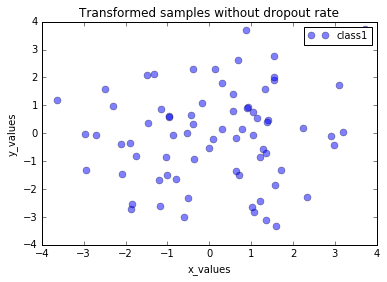

In [33]:
plt.plot(trans[:,0],trans[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples without dropout rate')

plt.show()

# Apply Drop Out Rate ($e^{-\lambda\mu^2}$) / Gaussian Noise

I believe the proper order is:
1. generate low dim data
2. add gaussian noise to low dim
3. project back to high dim and apply drop out rate

In [34]:
lmbda = -1
mu = 2
p_0 = math.e**(lmbda * mu**2)
p_0

0.018315638888734186

In [35]:
def drop_out(p):
    return np.random.binomial(1, p, 1)[0]


In [36]:
#s = np.random.binomial(1, p_0, 100000000)
#print sum(s)/100000000.0


In [37]:
t = all_samples.T
shape(t)[0]

75

In [38]:
#gaussian noise
noise_m = .25 * np.random.randn(shape(all_samples.T)[0], shape(all_samples.T)[1]) 
noise_m

array([[ 0.09024916,  0.21820303, -0.1307409 , ..., -0.05385046,
        -0.11956066, -0.29872798],
       [-0.28661506, -0.28899398,  0.34873105, ...,  0.16010455,
         0.11464707, -0.22822619],
       [ 0.14655378, -0.65267289,  0.06737925, ...,  0.09323175,
         0.46016661, -0.0605163 ],
       ..., 
       [ 0.16280983, -0.08067704, -0.11004852, ..., -0.11028747,
         0.03849165, -0.29604856],
       [-0.1578883 ,  0.1068314 ,  0.50113094, ..., -0.1732957 ,
        -0.06641327, -0.06295497],
       [ 0.15425972,  0.0657771 ,  0.65085863, ..., -0.12305981,
        -0.2769939 ,  0.20895146]])

# dropped out data

In [39]:
noise_drop_matrix = all_samples.T + noise_m
for (i,j), value in numpy.ndenumerate(noise_drop_matrix):
    if (drop_out(p_0) == 1):
        noise_drop_matrix[i,j] = 0

In [40]:
noise_drop_matrix

array([[ 0.73865783,  0.88752656, -1.21128462, ..., -2.06774074,
        -1.27925013, -0.26836942],
       [-1.02816622, -0.4019971 ,  2.38507217, ..., -0.5316448 ,
        -1.00206652, -0.32730956],
       [-0.2015795 , -1.77746989,  0.06535193, ...,  1.45821049,
         2.19246807, -0.2505285 ],
       ..., 
       [ 0.15621475, -0.6743621 , -1.38946043, ...,  0.30475514,
        -0.1530382 , -0.28339607],
       [-2.23828243,  0.88139631, -0.65056768, ..., -1.12941699,
        -0.79250752,  0.69976771],
       [ 0.34235999,  1.33029488, -0.70201895, ..., -1.08163426,
        -2.79210116,  0.44315761]])

In [41]:
# pca = sklearnPCA(n_components=3)
# fitted = pca.fit(all_samples.T)
# red = np.dot(all_samples.T - pca.mean_, pca.components_.T)
# original = np.dot(red, pca.components_) + pca.mean_
#shape(all_samples.T)
# shape(original)
#test
#np.allclose(pca.inverse_transform(pca.transform(all_samples.T)), all_samples.T)

In [42]:
#--test cell--

In [43]:
fitted1 = pca.fit(noise_drop_matrix)
noise_memes = pca.transform(noise_drop_matrix)

# Visualization Check

Populating the interactive namespace from numpy and matplotlib


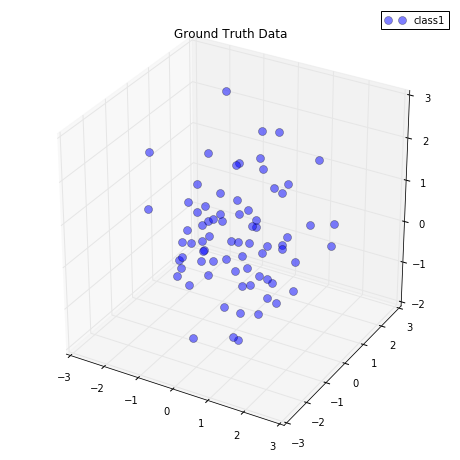

Populating the interactive namespace from numpy and matplotlib


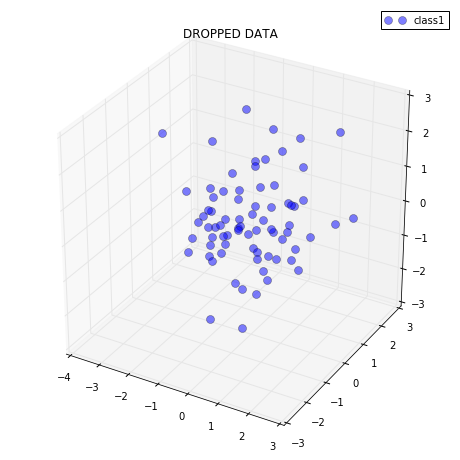

In [44]:
%pylab inline

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')

plt.title('Ground Truth Data')
ax.legend(loc='upper right')

plt.show()


%pylab inline

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(noise_drop_matrix.T[0,:], noise_drop_matrix.T[1,:], noise_drop_matrix.T[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')

plt.title('DROPPED DATA')
ax.legend(loc='upper right')

plt.show()

# PCA Visualization Check

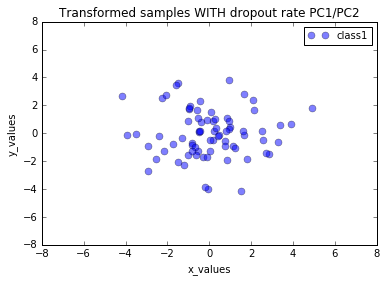

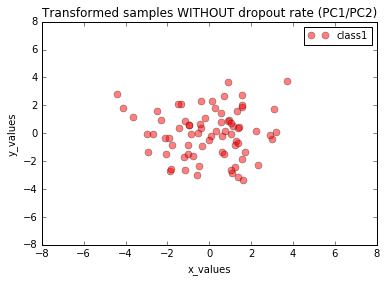

In [51]:
plt.plot(noise_memes[:,0],noise_memes[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.legend()
plt.title('Transformed samples WITH dropout rate PC1/PC2')

plt.show()

plt.plot(trans[:,0],trans[:,1], 'o', markersize=7, color='red', alpha=0.5, label='class1')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.legend()
plt.title('Transformed samples WITHOUT dropout rate (PC1/PC2)')

plt.show()

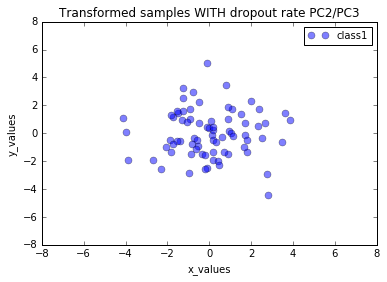

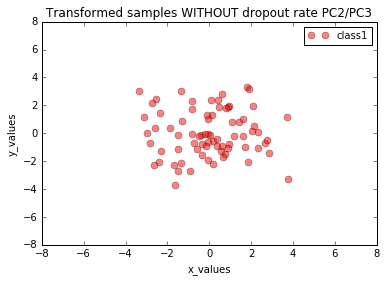

In [52]:
plt.plot(noise_memes[:,1],noise_memes[:,2], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.legend()
plt.title('Transformed samples WITH dropout rate PC2/PC3')

plt.show()

plt.plot(trans[:,1],trans[:,2], 'o', markersize=7, color='red', alpha=0.5, label='class1')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.legend()
plt.title('Transformed samples WITHOUT dropout rate PC2/PC3')

plt.show()

# Goal is to go from blue to red

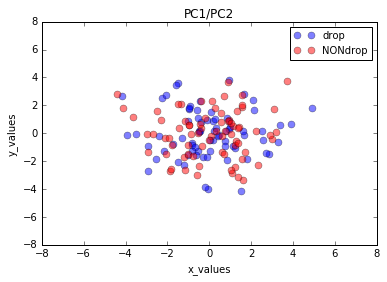

In [56]:
plt.plot(noise_memes[:,0],noise_memes[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='drop')
plt.plot(trans[:,0],trans[:,1], 'o', markersize=7, color='red', alpha=0.5, label='NONdrop')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.legend()
plt.title('PC1/PC2')

plt.show()

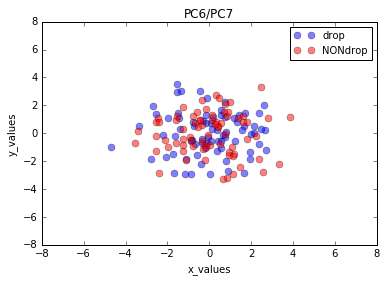

In [57]:
plt.plot(noise_memes[:,5],noise_memes[:,6], 'o', markersize=7, color='blue', alpha=0.5, label='drop')
plt.plot(trans[:,5],trans[:,6], 'o', markersize=7, color='red', alpha=0.5, label='NONdrop')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.legend()
plt.title('PC6/PC7')

plt.show()

# Fix time